# [Bitcoin - Group 30]

Group Members:
* Belin Gül
* Bükre Aleyna Kitapci
* Defne Akter
* Mustafa Cem Büyükalpelli

## Introduction

<font color="white">
First, we will be visualizing the data in time-series format, both as a whole and separate features. We will also be monitoring the high and low values, how they change over time and their comparisons. Secondly, we will be conducting statistical tests in order to understand the contribution of volume and close features, differences between different time frames, the fluctuations in the market on any given day and so on. Moreover, we are particularly interested in implementing machine learning algorithms that will predict the future of bitcoin. The predictions will vary: How a market fluctuates on a daily basis, if a particular day is a good day to purchase in a 30-day time frame, trends for a future span of 6 months etc.Throughout Bitcoin's rise, popularity and popular mentions have been crucial to its rise and fall. The most influential person in the Bitcoin market has been Elon Musk with his 81 million followers on Twitter. In addition to other features we want to make the market more predictable by working on Elon Musk's tweets and this impact on Bitcoin.


</font>

### Utilized Datasets

<font color="white">
We work with additional datasets which are related directly with bitcoin fluctuation and Elon Musk's tweets.

[Elon Musk's tweets](https://www.kaggle.com/code/andradaolteanu/bitcoin-dogecoin-on-rapids-and-elon-musk)

[Main Dataset](https://drive.google.com/file/d/16oJB3upKi8kAsxs_If2_HGq8ECZp5Y04/view?usp=sharing)



</font>

<font color="white">
We add replies_count,retweet_date,retweets_count and video features for now from Elon Musks's tweets dataset, We are planning to develop it furthermore.

<font>

<font color="white">
Installation of required libraries
</font>

In [ ]:
from google.colab import drive
from os.path import join
import matplotlib.pyplot as plt

drive.mount('./drive')
path_prefix1 = './drive/My Drive'
path_prefix = "./drive/MyDrive/data"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from scipy import stats
from scipy.stats import f_oneway
from scipy import special
import seaborn as sns
from os.path import join
from os import listdir
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from os.path import join
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Exploratory Data Analysis



# <font color="white">
We are reading our data.
</font>

In [ ]:
all_df = pd.read_csv(join(path_prefix,"BTC-USD.csv"));
elon_df = pd.read_csv(join(path_prefix,"TweetsElonMusk.csv"));
el_df = pd.read_csv(join(path_prefix,"TweetsElonMusk.csv"));

In [ ]:
all_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
all_df.shape

(2755, 7)

In [ ]:
el_df.describe()

,id,conversation_id,timezone,user_id,place,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.256200e+04,1.256200e+04,12562.0,12562.0,0.0,12562.000000,12562.000000,1.256200e+04,12562.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.049919e+18,1.047490e+18,300.0,44196397.0,NaN,679.370005,2256.727193,2.147006e+04,0.063047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.761981e+17,2.783202e+17,0.0,0.0,NaN,2453.853763,9793.382524,6.727787e+04,0.243058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.543473e+10,1.659576e+09,300.0,44196397.0,NaN,0.000000,0.000000,2.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.444958e+17,9.413883e+17,300.0,44196397.0,NaN,45.000000,45.000000,8.790000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.117568e+18,1.117117e+18,300.0,44196397.0,NaN,113.000000,144.500000,2.439500e+03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.255896e+18,1.254922e+18,300.0,44196397.0,NaN,373.000000,847.750000,1.128250e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.383296e+18,1.383296e+18,300.0,44196397.0,NaN,61349.000000,361461.000000,1.593425e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:

elon_df["time"] = elon_df["time"].astype(str)
elon_df["time"] = elon_df["time"].str.replace(':', '')
elon_df["time"]= elon_df["time"].astype(int)
elon_df["time"] = elon_df["time"] - 120000
print(elon_df["time"]);

0         65033
1         64858
2         54938
3         32349
4        -28153
          ...  
12557     -4686
12558    -14955
12559    -15175
12560    -85855
12561    102511
Name: time, Length: 12562, dtype: int64


In [ ]:
elon_df[["replies_count","retweet_date", "retweets_count", "time"]].describe()

,replies_count,retweet_date,retweets_count,time
count,12562.000000,0.0,12562.000000,12562.000000
mean,679.370005,NaN,2256.727193,-4554.416176
std,2453.853763,NaN,9793.382524,79009.060851
min,0.000000,NaN,0.000000,-119996.000000
25%,45.000000,NaN,45.000000,-76740.250000
50%,113.000000,NaN,144.500000,-19255.500000
75%,373.000000,NaN,847.750000,80521.000000
max,61349.000000,NaN,361461.000000,115956.000000


In [ ]:

elon_df["time"] = elon_df["time"].astype(str)
elon_df["time"] = elon_df["time"].str.replace(':', '')
elon_df["time"]= elon_df["time"].astype(int)
elon_df["time"] = elon_df["time"] - 120000
print(elon_df["time"]);

0        -54967
1        -55142
2        -65062
3        -87651
4       -148153
          ...  
12557   -124686
12558   -134955
12559   -135175
12560   -205855
12561    -17489
Name: time, Length: 12562, dtype: int64


In [ ]:
elon_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,-54967,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,-55142,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,-65062,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,-87651,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,-148153,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN


In [ ]:
print(elon_df["replies_count"]);

0         640
1        2464
2         115
3        8437
4         446
         ... 
12557     142
12558     283
12559     598
12560     374
12561    1289
Name: replies_count, Length: 12562, dtype: int64


In [ ]:
print(elon_df["retweet_date"]);

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12557   NaN
12558   NaN
12559   NaN
12560   NaN
12561   NaN
Name: retweet_date, Length: 12562, dtype: float64


In [ ]:
print(elon_df["retweets_count"]);

0          444
1         1517
2           48
3        10329
4          542
         ...  
12557      102
12558      270
12559     1158
12560      204
12561     1192
Name: retweets_count, Length: 12562, dtype: int64


In [ ]:
print(elon_df["time"]);

0        -54967
1        -55142
2        -65062
3        -87651
4       -148153
          ...  
12557   -124686
12558   -134955
12559   -135175
12560   -205855
12561    -17489
Name: time, Length: 12562, dtype: int64


In [ ]:
all_df.mean()

Open         1.176866e+04
High         1.208290e+04
Low          1.142523e+04
Close        1.178373e+04
Adj Close    1.178373e+04
Volume       1.489443e+10
dtype: float64

In [ ]:
elon_df["time"].mean()
elon_df["replies_count"].mean()
elon_df["retweet_date"].mean()
elon_df["retweets_count"].mean()

2256.7271931221144

In [ ]:
all_df.var()

Open         2.691317e+08
High         2.836342e+08
Low          2.531349e+08
Close        2.693955e+08
Adj Close    2.693955e+08
Volume       3.976594e+20
dtype: float64

In [ ]:
elon_df["time"].var()

6242431696.497254

In [ ]:
elon_df["replies_count"].var()

6021398.289803184

In [ ]:
elon_df["retweet_date"].var()

nan

In [ ]:
elon_df["retweets_count"].var()

95910341.26248547

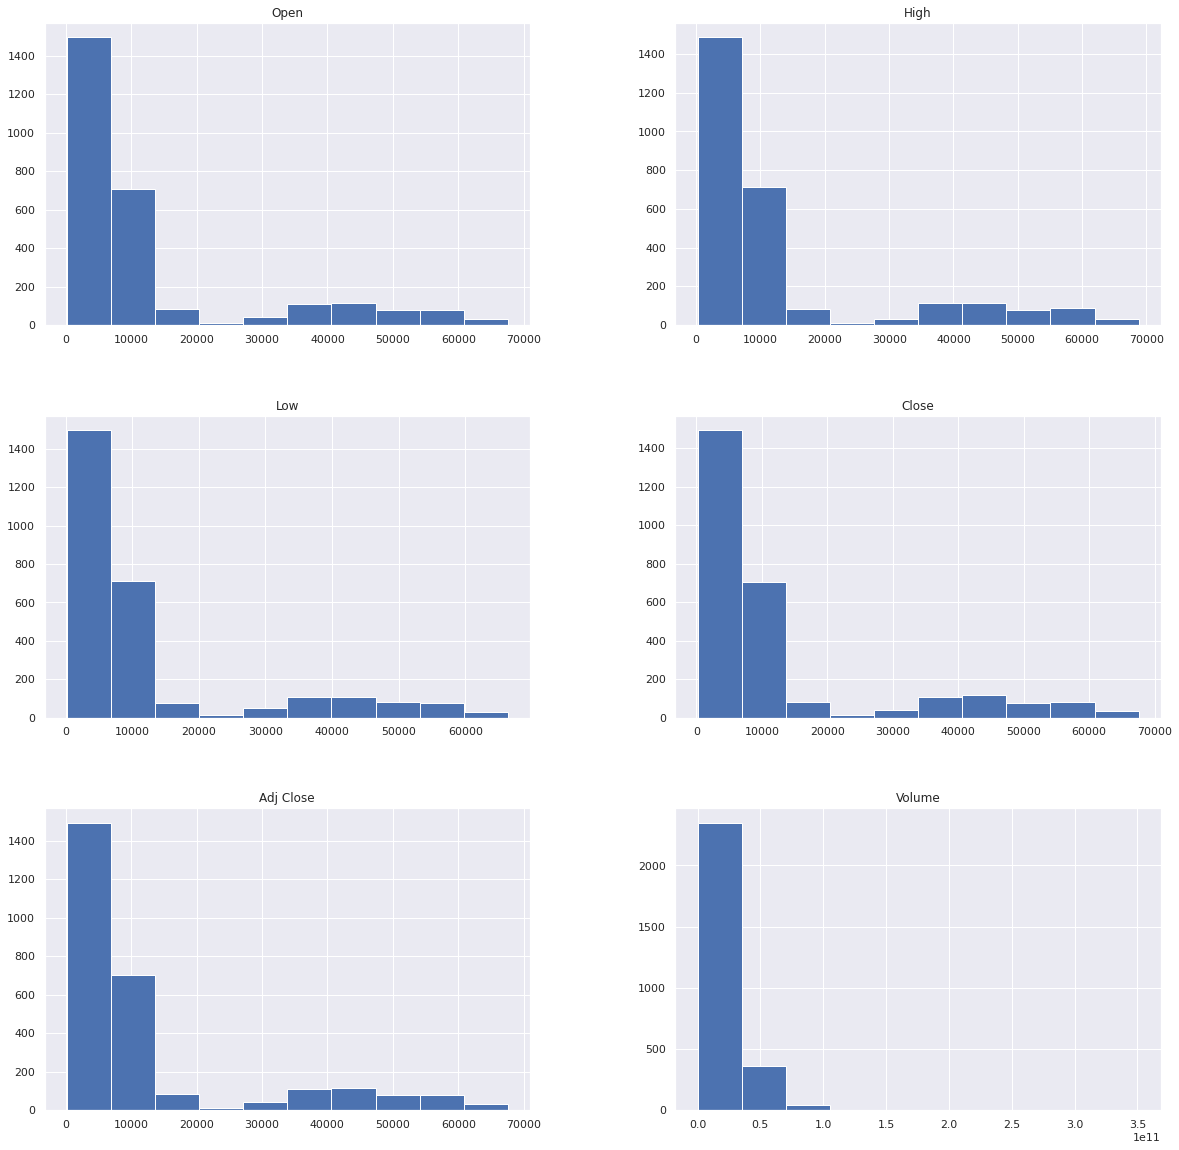

In [ ]:
all_df.hist(figsize=(20, 20))
plt.show()

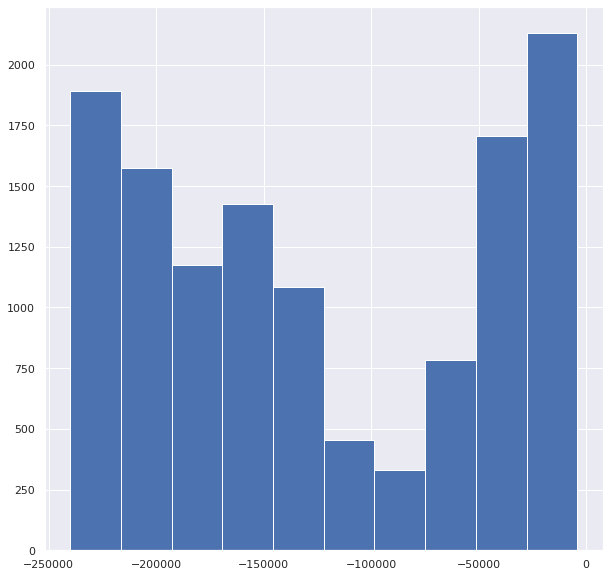

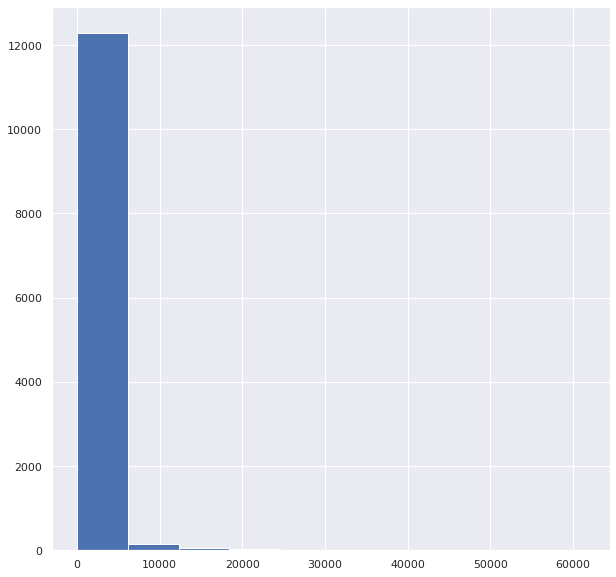

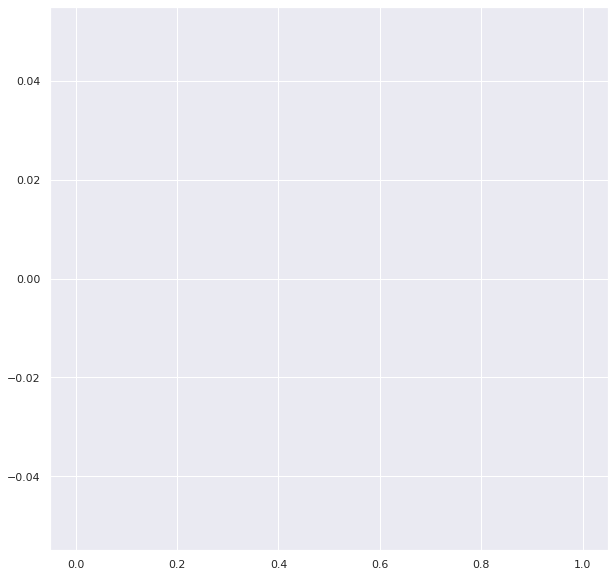

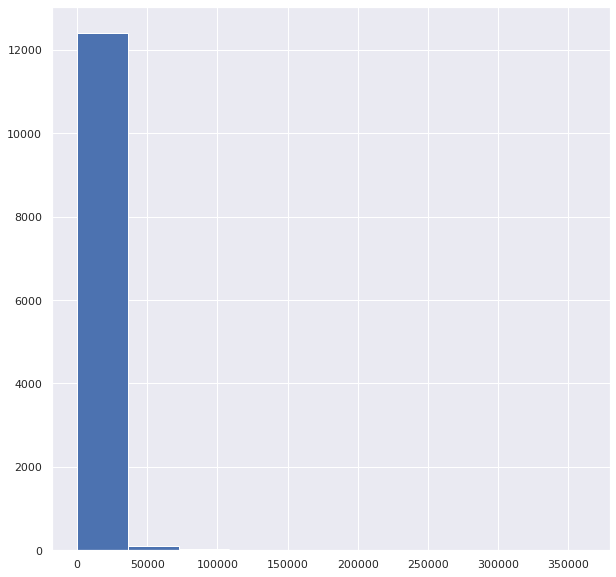

In [ ]:
elon_df["time"].hist(figsize=(10, 10))
plt.show()
elon_df["replies_count"].hist(figsize=(10, 10))
plt.show()
elon_df["retweet_date"].hist(figsize=(10, 10))
plt.show()
elon_df["retweets_count"].hist(figsize=(10, 10))
plt.show()

# <font color="pink">
Analysis of Features
</font>

Here is an analysis of High and Low Prices with respect to time. The time is terms of years, and to see the fluctuations we will be checking the difference.


We have duplicated our data in order to preserve the main dataset. In the High and Low Price analysis, we will be using the data from "dataforHighandLow".




In [ ]:
dataforHighandLow = all_df
dataforHighandLow


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287


<font color="white">
We are looking at the difference between the highest and lowest values, in order to understand the fluctuation of the currency throughout the years. The difference is added to the data as a column later on.<br>
</font>

In [ ]:
HighLowDifference = dataforHighandLow["High"] - dataforHighandLow["Low"]
HighLowDifference

0         15.752014
1         43.755981
2         43.302978
3         33.412994
4         19.244995
           ...     
2750     921.851563
2751     908.937500
2752    2121.488281
2753    2213.101563
2754     845.449219
Length: 2755, dtype: float64

In [ ]:
dataforHighandLow["High-Low Difference"] = HighLowDifference
dataforHighandLow

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low Difference
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995
...,...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069,921.851563
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962,908.937500
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106,2121.488281
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,2213.101563


The date is simplified at this point in order to simplify the time portion of the data. In order to do a better visualisation of high and low prices and fluctuations, we are using years.

In order to plot the graph, we changed the year variable type from a string to a numeric value, integer.





In [ ]:
dataforHighandLow["Date"] = dataforHighandLow["Date"].str[:-3]
dataforHighandLow["Date"] = dataforHighandLow["Date"].replace("-",".",regex=True)

dataforHighandLow

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low Difference
0,2014.09,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014
1,2014.09,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981
2,2014.09,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978
3,2014.09,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994
4,2014.09,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995
...,...,...,...,...,...,...,...,...
2750,2022.03,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069,921.851563
2751,2022.03,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962,908.937500
2752,2022.03,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106,2121.488281
2753,2022.04,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,2213.101563


In [ ]:
dataforHighandLow["Year"] = dataforHighandLow["Date"].str[:4]
dataforHighandLow

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low Difference,Year
0,2014.09,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,2014
1,2014.09,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,2014
2,2014.09,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,2014
3,2014.09,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,2014
4,2014.09,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,2014
...,...,...,...,...,...,...,...,...,...
2750,2022.03,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069,921.851563,2022
2751,2022.03,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962,908.937500,2022
2752,2022.03,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106,2121.488281,2022
2753,2022.04,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,2213.101563,2022


In [ ]:
dataforHighandLow[["Date","Year"]] = dataforHighandLow[["Date","Year"]].apply(pd.to_numeric)
dataforHighandLow.dtypes

Date                   float64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
High-Low Difference    float64
Year                     int64
dtype: object

In [ ]:
dataforHighandLow[["High","Low"]].describe()

,High,Low
count,2755.000000,2755.000000
mean,12082.896368,11425.227294
std,16841.443821,15910.212812
min,211.731003,171.509995
25%,612.311005,606.981994
50%,6504.649902,6297.930176
75%,11047.681152,10485.476074
max,68789.625000,66382.062500


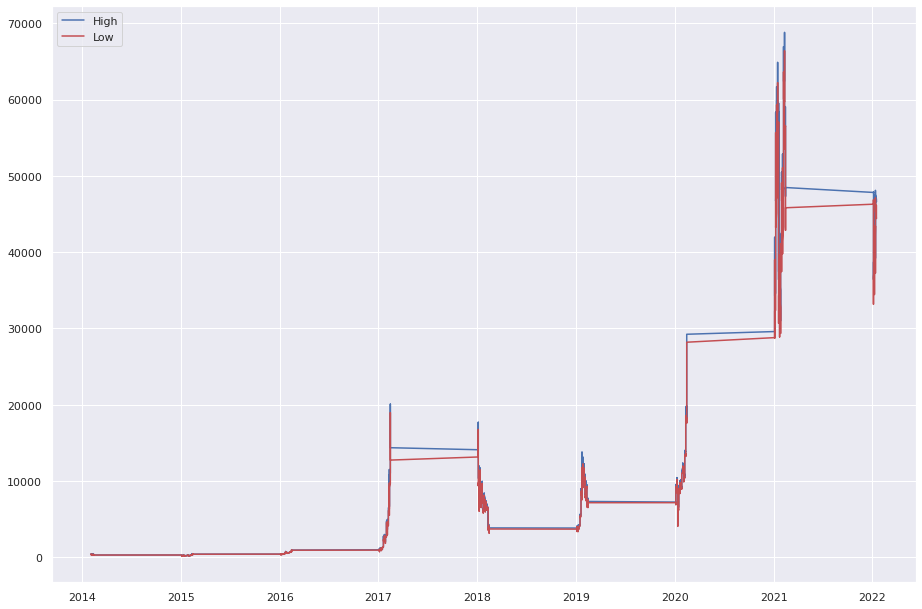

In [ ]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(dataforHighandLow["Date"], dataforHighandLow["High"], "b", label = "High")
ax.plot(dataforHighandLow["Date"], dataforHighandLow["Low"], "r", label = "Low")
ax.legend(loc = 2)

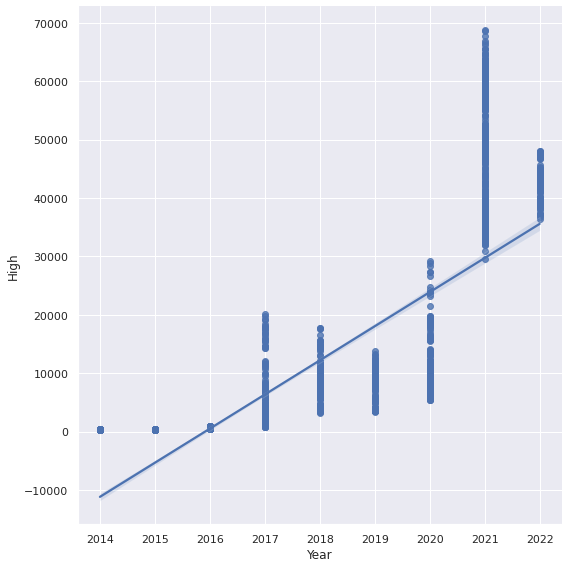

In [ ]:
highgraph_time = sns.lmplot(x = "Year", y="High",
                            truncate=True, height=8, data = dataforHighandLow)

highgraph_time.set_axis_labels("Year", "High")
plt.show()



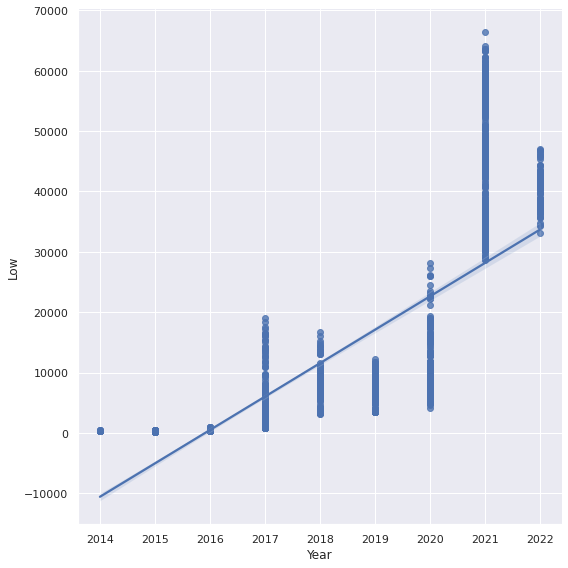

In [ ]:
highgraph_time = sns.lmplot(x = "Year", y="Low",
                            truncate=True, height=8, data = dataforHighandLow)

highgraph_time.set_axis_labels("Year", "Low")
plt.show()

In order to see the volume of a fluctuation in regards to time, we have chosen a lmplot-style graph. We can see that over time, the difference increases significantly, therefore daily highs and lows get more and more aggressive. This may suggest that there is more daily purchase.

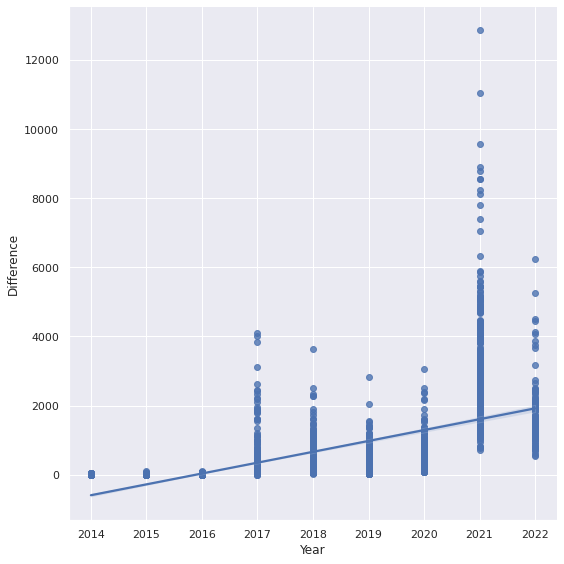

In [ ]:
sns.set(style="darkgrid")
differencegraphovertime = sns.lmplot(x="Year", y="High-Low Difference",
               truncate=True, height=8, data = dataforHighandLow)

differencegraphovertime.set_axis_labels("Year", "Difference")
plt.show()

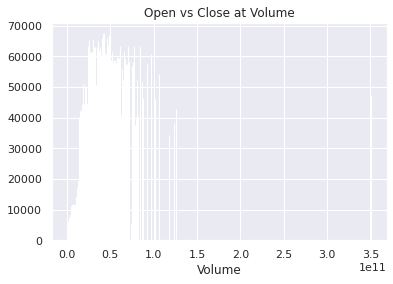

In [ ]:
plt.bar(all_df.Volume, all_df.Open, color='r')
plt.bar(all_df.Volume, all_df.Close, color='b')

plt.title('Open vs Close at Volume')
plt.xlabel('Volume')

plt.show()



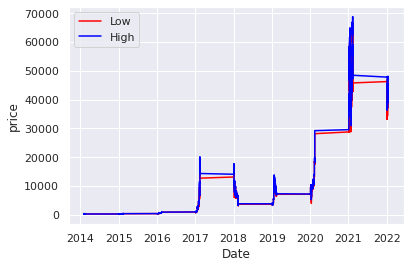

In [ ]:
plt.plot(all_df['Date'], all_df['Low'] , color='red')
plt.plot(all_df['Date'], all_df['High'] , color='blue')

# Set x,y lower, upper limits:
#plt.xlim([0, 2022])
#plt.ylim([0, 2014])
plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["Low","High"])

plt.show()

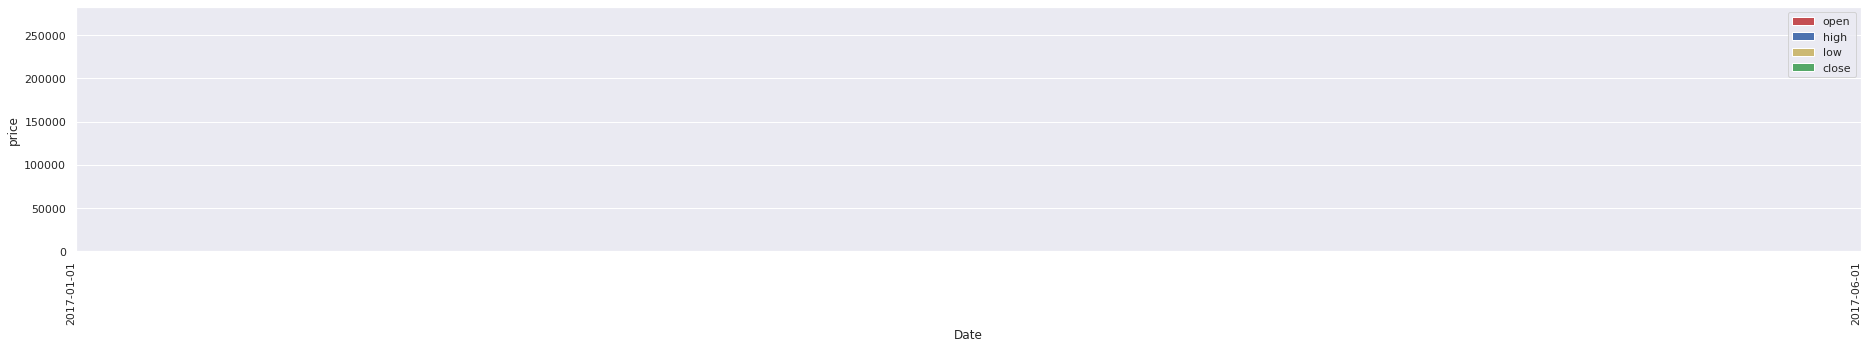

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis




plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])


plt.xlim(["2017-01-01","2017-06-01"])
plt.show()

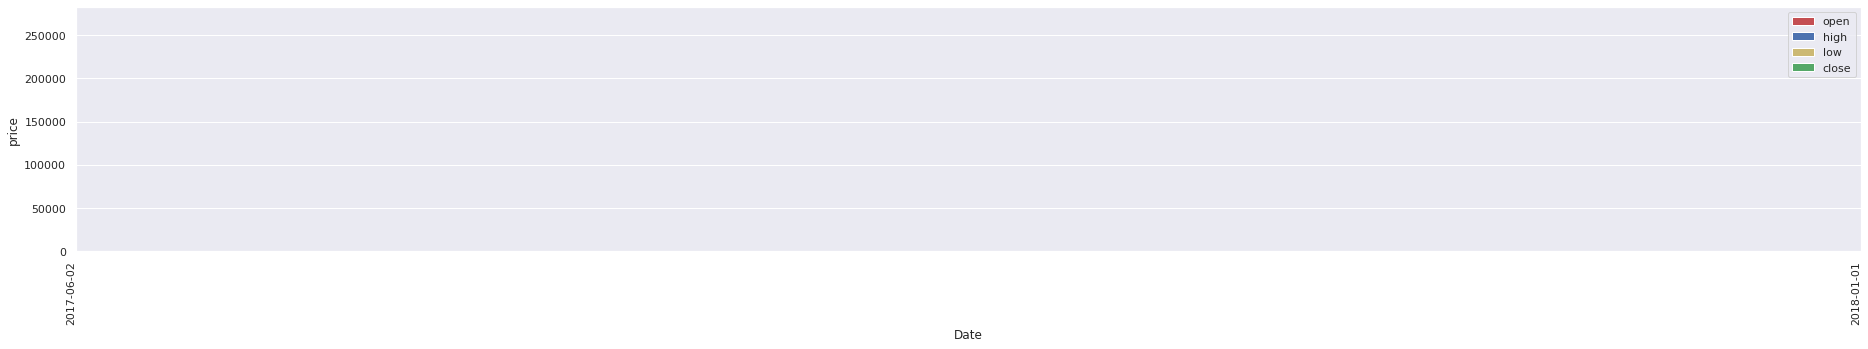

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis




plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])


plt.xlim(["2017-06-02","2018-01-01"])
plt.show()

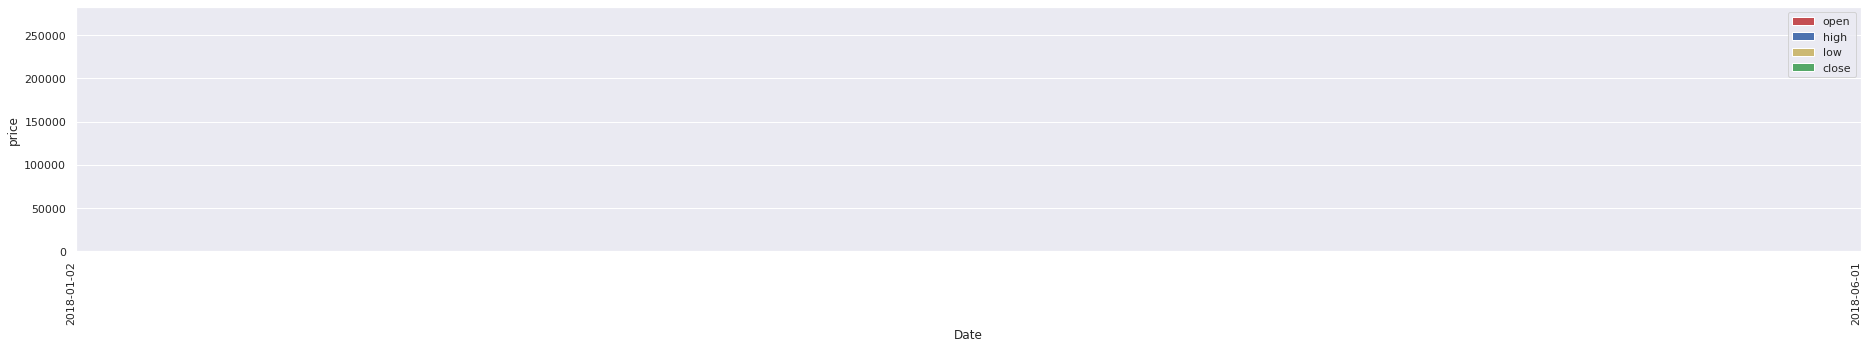

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis




plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])


plt.xlim(["2018-01-02","2018-06-01"])
plt.show()

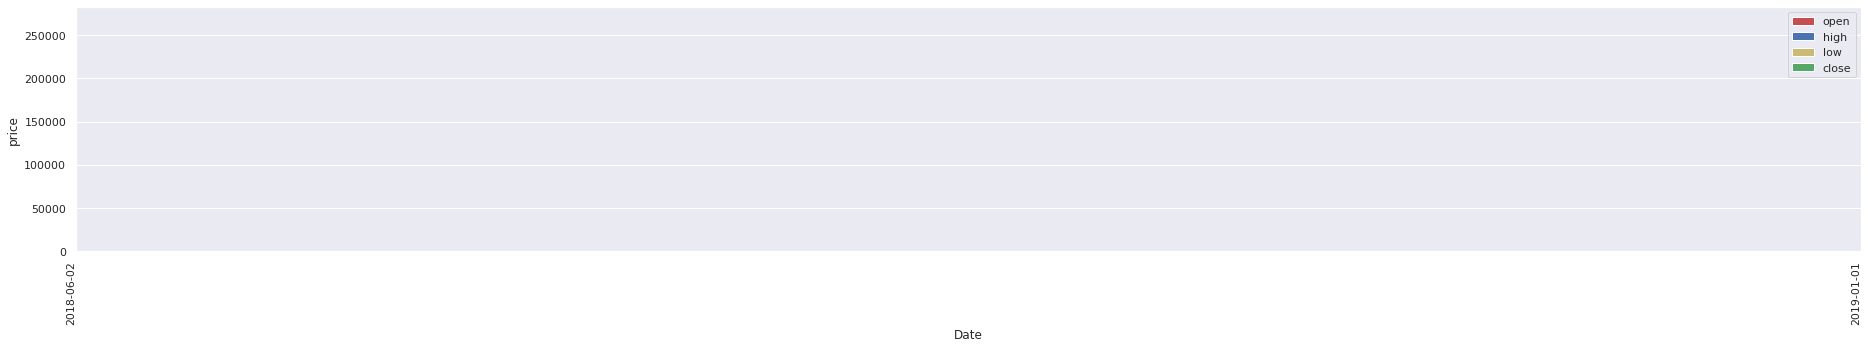

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis





plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])


plt.xlim(["2018-06-02","2019-01-01"])
plt.show()

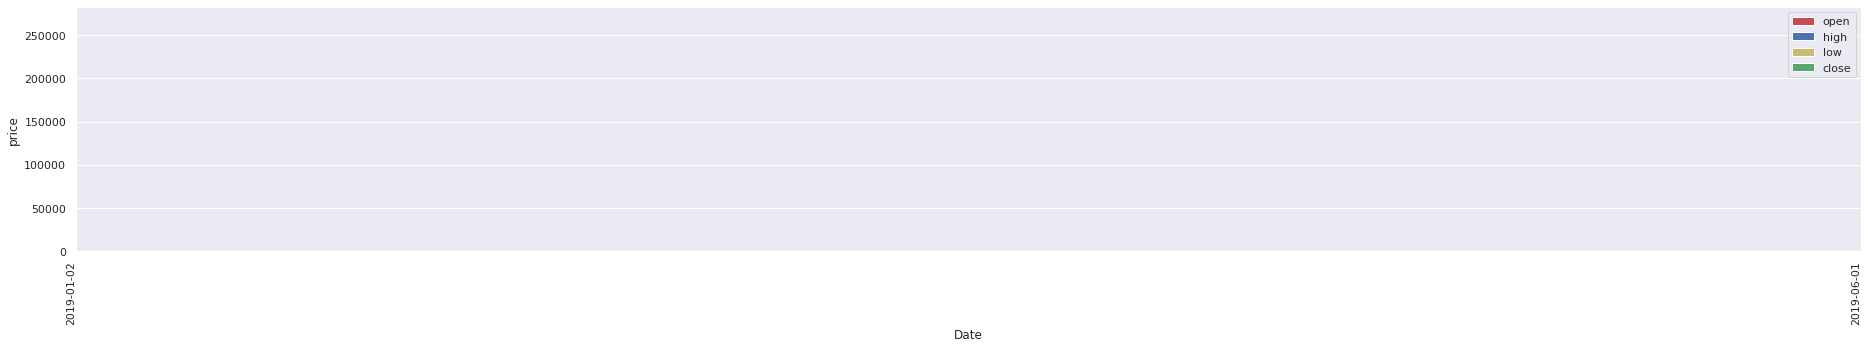

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis



plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')


# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])


plt.xlim(["2019-01-02","2019-06-01"])
plt.show()

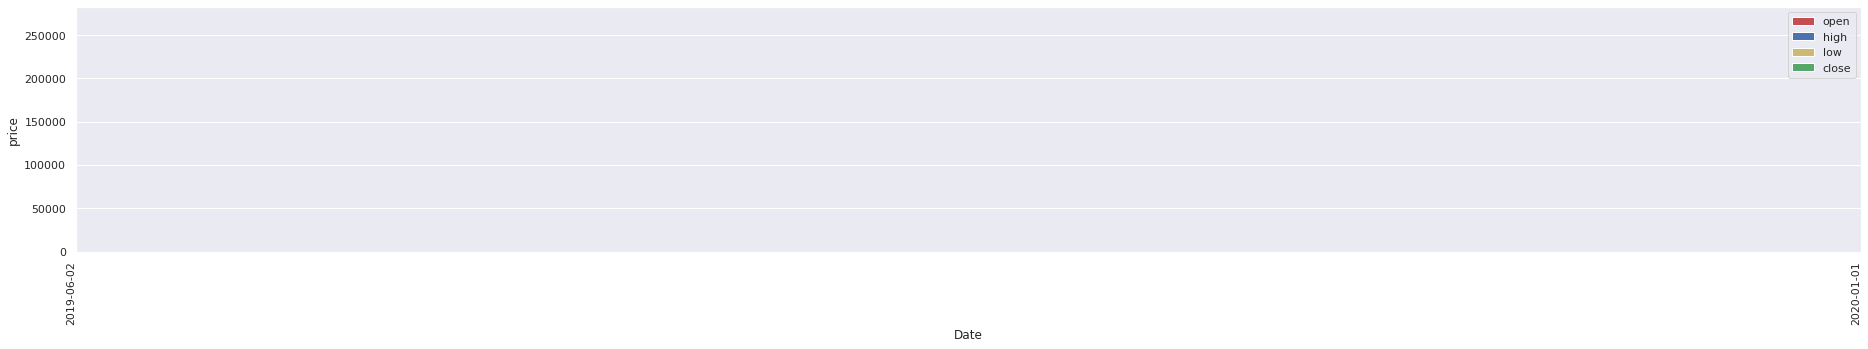

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis



plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')


# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])


plt.xlim(["2019-06-02","2020-01-01"])
plt.show()

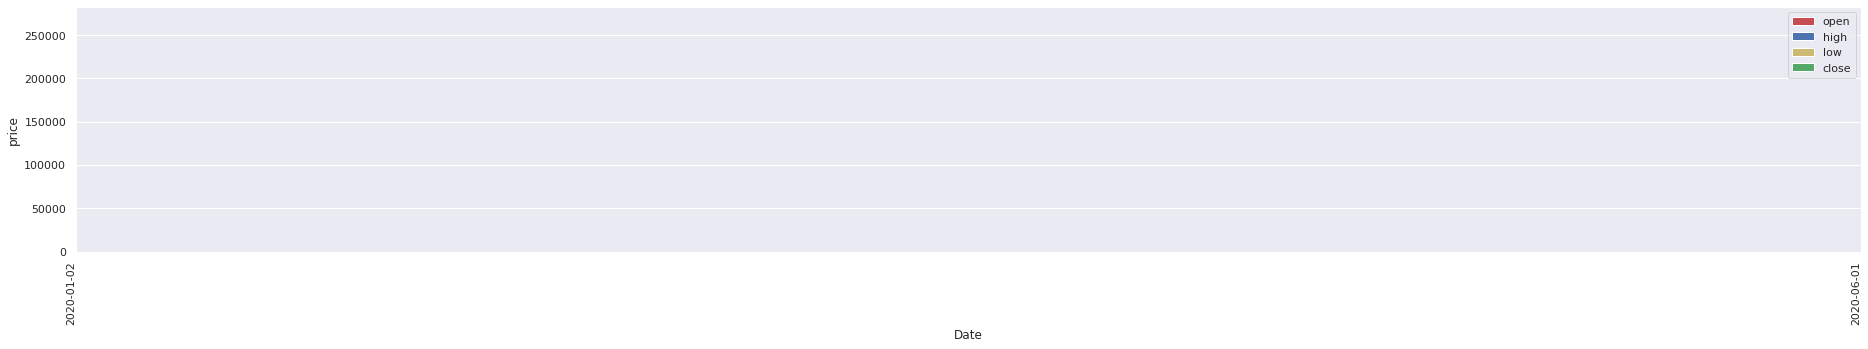

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis



plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')


# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])



plt.xlim(["2020-01-02","2020-06-01"])
plt.show()

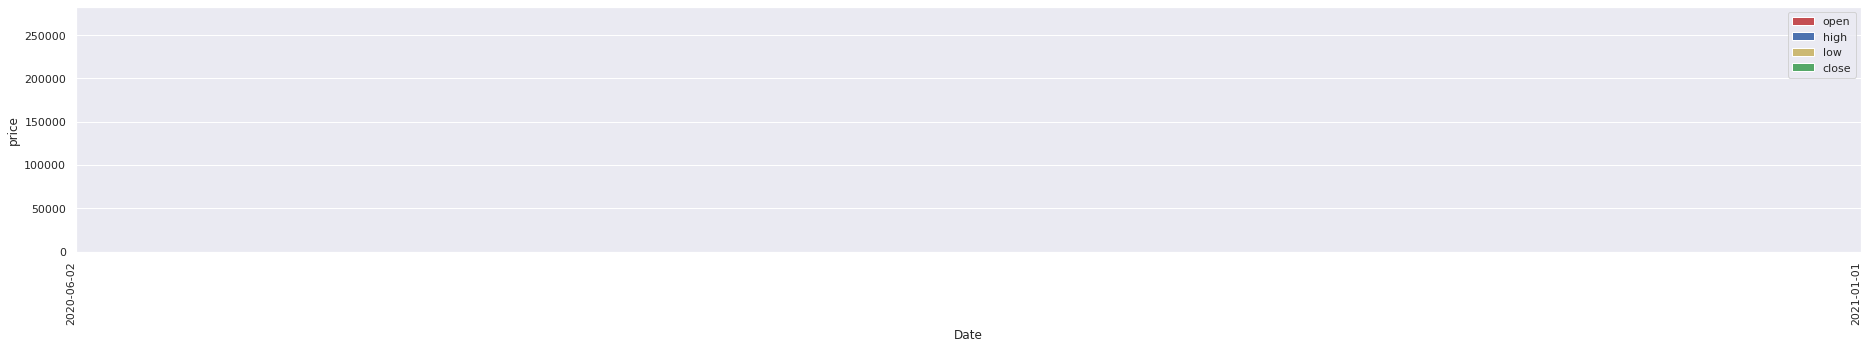

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis



plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')


# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])



plt.xlim(["2020-06-02","2021-01-01"])
plt.show()

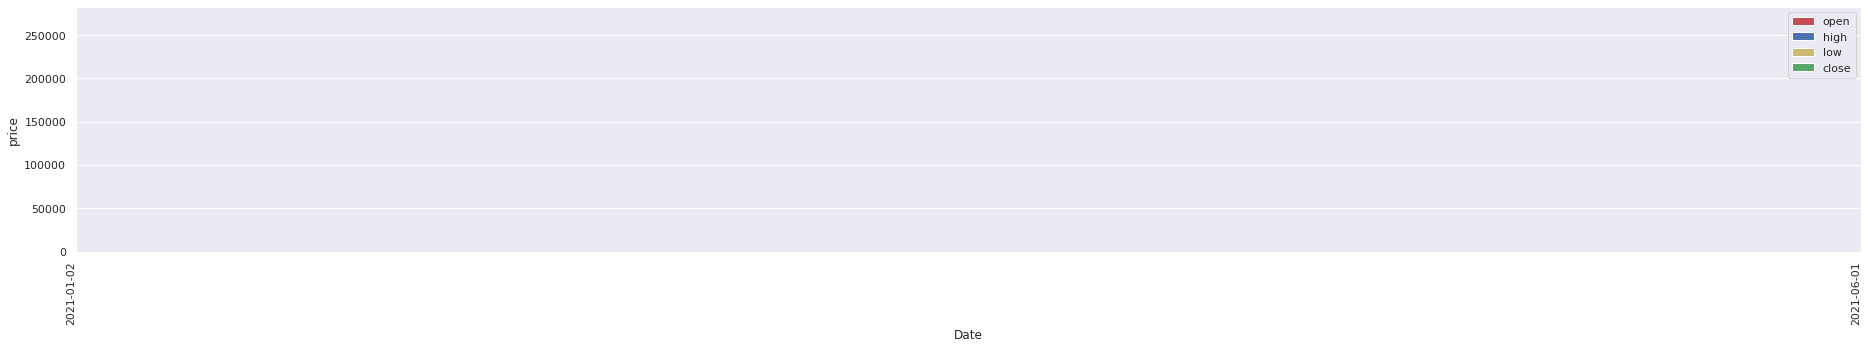

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis



plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')


# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])



plt.xlim(["2021-01-02","2021-06-01"])
plt.show()

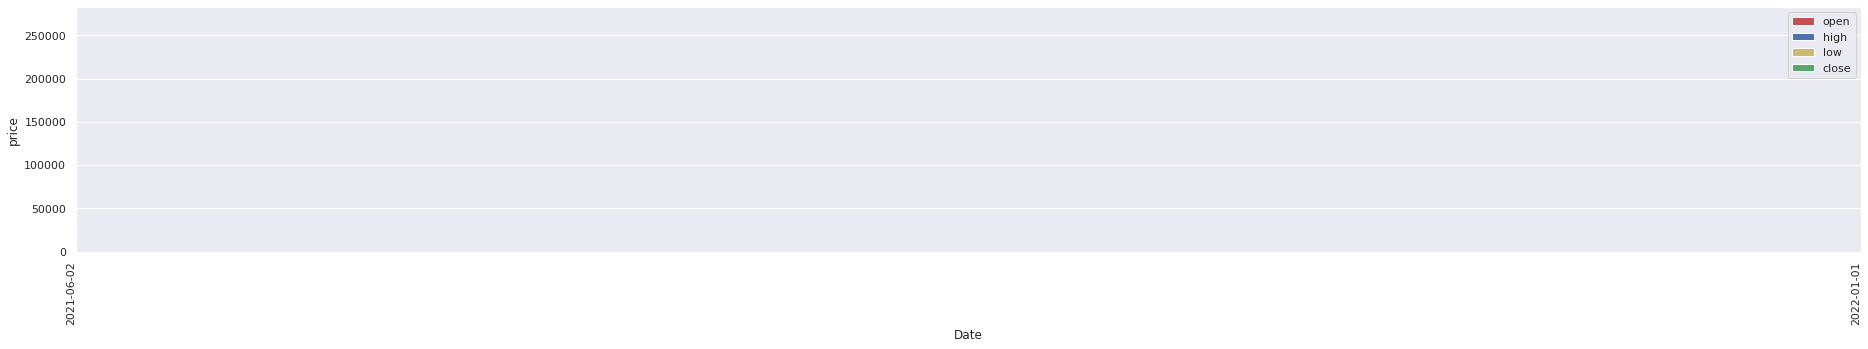

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis



plt.bar(all_df["Date"], all_df["Open"], color='r')
plt.bar(all_df["Date"], all_df['High'], bottom= all_df["Open"], color='b')
plt.bar(all_df["Date"],all_df['Low'], bottom= all_df["Open"]+ all_df['High'], color='y')
plt.bar(all_df["Date"], all_df['Close'], bottom= all_df["Open"]+ all_df['High']+all_df['Low'], color='g')


# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])



plt.xlim(["2021-06-02","2022-01-01"])
plt.show()

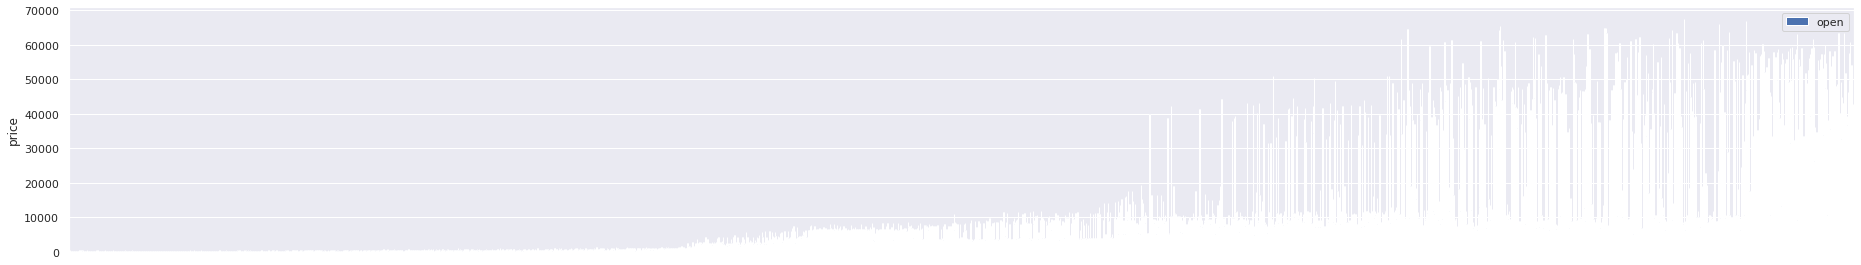

In [ ]:
#pk = df.groupby(["Volume"])
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis




#plt.barh(df["Volume"], df["Open"], color='r')
ax = all_df.groupby(by="Volume") \
  .mean()["Open"] \
  .plot(kind="bar")

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["open", "high", "low", "close"])
plt.gca().axes.get_xaxis().set_visible(False)

#plt.xlim([5914570,35096794147])
plt.show()

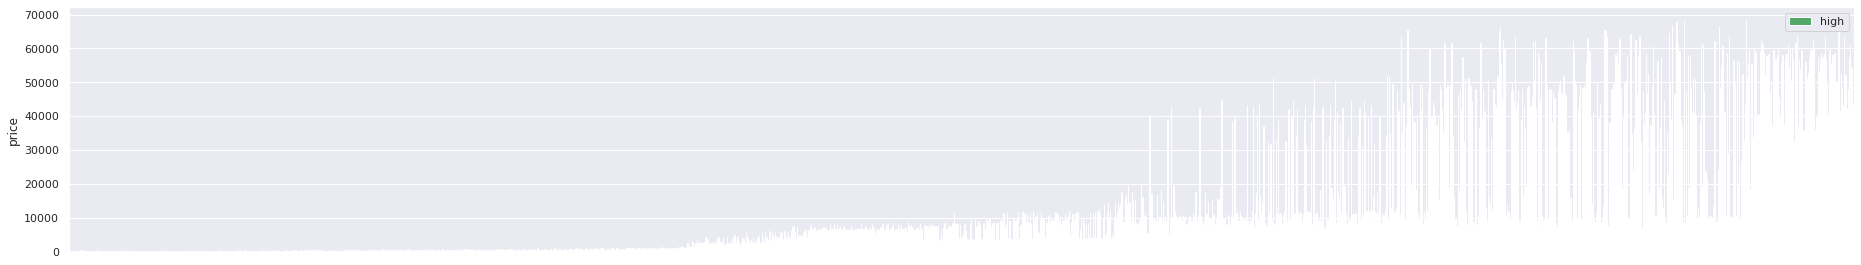

In [ ]:
#pk = df.groupby(["Volume"])
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis




#plt.barh(df["Volume"], df["Open"], color='r')
ax = all_df.groupby(by="Volume") \
  .mean()["High"] \
  .plot(kind="bar", color = "g")

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["high"])
plt.gca().axes.get_xaxis().set_visible(False)

#plt.xlim([5914570,35096794147])
plt.show()

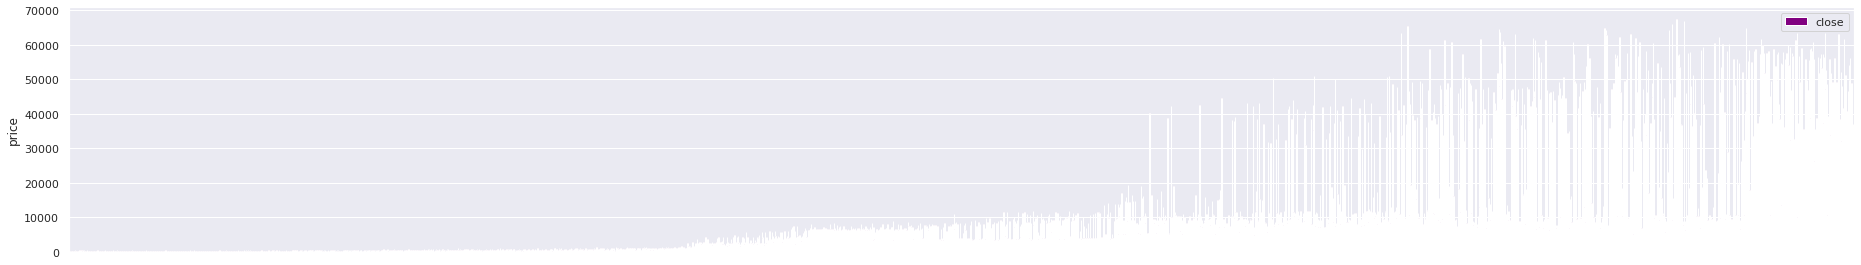

In [ ]:
#pk = df.groupby(["Volume"])
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis




#plt.barh(df["Volume"], df["Open"], color='r')
ax = all_df.groupby(by="Volume") \
  .mean()["Close"] \
  .plot(kind="bar" , color = "purple")

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["close"])
plt.gca().axes.get_xaxis().set_visible(False)

#plt.xlim([5914570,35096794147])
plt.show()

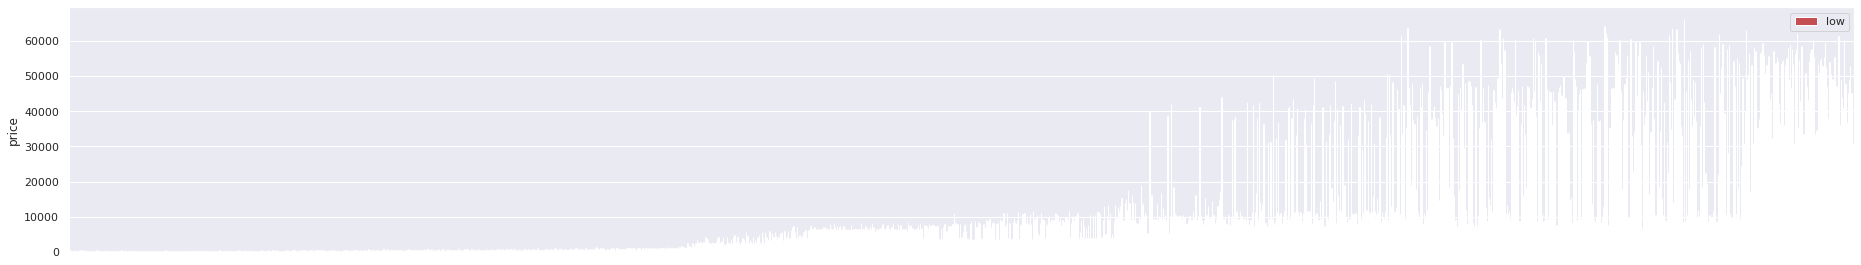

In [ ]:
fig, ax = plt.subplots(figsize=(32, 5))
fig.autofmt_xdate(rotation=90)
# Add x-axis and y-axis




#plt.barh(df["Volume"], df["Open"], color='r')
ax = all_df.groupby(by="Volume") \
  .mean()["Low"] \
  .plot(kind="bar" , color = "r")

# Set title and labels for axes
#ax.set(xlabel="Date", ylabel="low",)

plt.xlabel("Date")
plt.ylabel("price")
plt.legend(["low",])
plt.gca().axes.get_xaxis().set_visible(False)

#plt.xlim([5914570,35096794147])
plt.show()

# Statistical Analysis & Hypothesis Testing

# <font color="white">
We are conducting statistical tests to check how (or if) the volume and close features (in both single and combined manner) contributes to opening price of the next day.
</font>

In [ ]:
next_day_opening_price = all_df.loc[1:]['Open']

In [ ]:
next_day_opening_price

1         456.859985
2         424.102997
3         394.673004
4         408.084991
5         399.100006
            ...     
2750    47100.437500
2751    47456.898438
2752    47062.148438
2753    45554.164063
2754    46168.101563
Name: Open, Length: 2754, dtype: float64

In [ ]:
prev_days= all_df.drop(all_df.tail(1).index)

In [ ]:
next_day_opening_price.corr(prev_days['Volume'])

0.7242979820465036

In [ ]:
next_day_opening_price.corr(prev_days['Close'])

0.9988319358427098

In [ ]:
open_features = all_df["Open"]
open_features

0         465.864014
1         456.859985
2         424.102997
3         394.673004
4         408.084991
            ...     
2750    47100.437500
2751    47456.898438
2752    47062.148438
2753    45554.164063
2754    46168.101563
Name: Open, Length: 2755, dtype: float64

Statistical tests to check how (or if) the volume and close features (in both single and combined manner) contributes to opening price of the next day with Elon Musk's tweets data

In [ ]:
#prev_days= el_df.drop(all_df.tail(1).index)

In [ ]:
next_day_opening_price.corr(prev_days['Volume'])

In [ ]:
next_day_opening_price.corr(prev_days['Close'])

In [ ]:
open_features = all_df["Open"]
open_features

# <font color="white">
Checking how open price affects high and low prices of that day, close prices affect the prices and the differences between the affect of them. The comparison of correlation between features.
</font>


In [ ]:
high_values = all_df["High"]

In [ ]:
low_values = all_df["Low"]

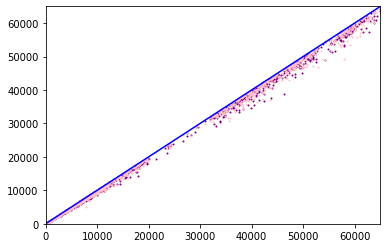

In [ ]:
plt.xlim(0, 65000)
plt.ylim(0, 65000)

plt.scatter(all_df["High"], all_df["Open"], s = 1, c  ="purple")
plt.scatter(all_df["High"], all_df["Close"],s = 1, c = "pink")
x = np.linspace(0, 70000)
plt.plot(x, x, c = "blue") #plotting x=y line in order to see full correlation points

In [ ]:
all_df[['Open', 'High', 'Close']].corr().style.background_gradient(cmap="RdPu")

,Open,High,Close
Open,1.000000,0.999526,0.998834
High,0.999526,1.000000,0.999497
Close,0.998834,0.999497,1.000000


Interestingly, Opening price seems to have a somewhat higher correlation with High value of a day rather than Close prices and this increase happens when the prices are higher as well. Now let's check the same with Low values.


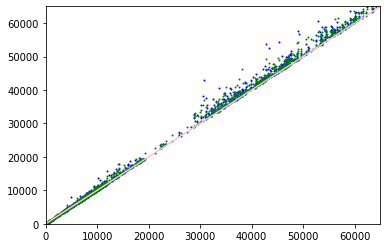

In [ ]:
plt.xlim(0, 65000)
plt.ylim(0, 65000)

plt.scatter(all_df["Low"], all_df["Open"],  s = 1, c  ="blue")
plt.scatter(all_df["Low"], all_df["Close"], s = 1, c = "green")

x = np.linspace(0, 70000)
plt.plot(x, x, c = "pink") #plotting x=y line in order to see full correlation points

In [ ]:
all_df[['Open', 'Low', 'Close']].corr().style.background_gradient(cmap="GnBu")

,Open,Low,Close
Open,1.000000,0.999121,0.998834
Low,0.999121,1.000000,0.999391
Close,0.998834,0.999391,1.000000


High values have more correlation with Open and Close prices of a day than Low prices. And here, low values have more correlation with closing values. This teaches us something: Opening prices are close to high prices, therefore bitcoin prices tend to be higher earlier in the day and get lower when we get closer to closing-time of the market. Therefore, a buyer should buy late and a seller should sell early.

Of course, this market is open to manipulations and fluctuations, therefore there are drastic changes from time to time.

# <font color="white">
Statistical tests to check if significant differences exist between different months of a single year and same month of different years
</font>

# Machine Learning

# <font color="pink">
Machine Learning Task 1: -	Prediction of opening price for a single day given all data of previous 30 days
</font>

We are predicting the opening price of the 31st day by training the model with High, Low, Close, Adj Close and Volume values of thirty days.

We are using Regressing method as this is a continious variable and we are using kNN regressor method.

In [ ]:
training_data_und = all_df[['High','Low','Close','Adj Close','Volume']]
training_data_und = training_data_und[:30].values
training_data_und

array([[4.68174011e+02, 4.52421997e+02, 4.57334015e+02, 4.57334015e+02,
        2.10568000e+07],
       [4.56859985e+02, 4.13104004e+02, 4.24440002e+02, 4.24440002e+02,
        3.44832000e+07],
       [4.27834991e+02, 3.84532013e+02, 3.94795990e+02, 3.94795990e+02,
        3.79197000e+07],
       [4.23295990e+02, 3.89882996e+02, 4.08903992e+02, 4.08903992e+02,
        3.68636000e+07],
       [4.12425995e+02, 3.93181000e+02, 3.98821014e+02, 3.98821014e+02,
        2.65801000e+07],
       [4.06915985e+02, 3.97130005e+02, 4.02152008e+02, 4.02152008e+02,
        2.41276000e+07],
       [4.41557007e+02, 3.96196991e+02, 4.35790985e+02, 4.35790985e+02,
        4.50995000e+07],
       [4.36112000e+02, 4.21131989e+02, 4.23204987e+02, 4.23204987e+02,
        3.06277000e+07],
       [4.23519989e+02, 4.09467987e+02, 4.11574005e+02, 4.11574005e+02,
        2.68144000e+07],
       [4.14937988e+02, 4.00009003e+02, 4.04424988e+02, 4.04424988e+02,
        2.14608000e+07],
       [4.06622986e+02, 3.9737

In [ ]:
training_data_dep = all_df[['Open']]
training_data_dep = training_data_dep[:30].values
training_data_dep

array([[465.864014],
       [456.859985],
       [424.102997],
       [394.673004],
       [408.084991],
       [399.100006],
       [402.09201 ],
       [435.751007],
       [423.156006],
       [411.428986],
       [403.556   ],
       [399.471008],
       [376.928009],
       [376.088013],
       [387.427002],
       [383.988007],
       [375.181   ],
       [359.891998],
       [328.915985],
       [320.389008],
       [330.584015],
       [336.115997],
       [352.747986],
       [364.687012],
       [361.362   ],
       [362.605988],
       [377.92099 ],
       [391.691986],
       [400.954987],
       [394.518005]])

In [ ]:
test_data_und = all_df[['High','Low','Close','Adj Close','Volume']]
test_data_und = test_data_und.iloc[31].values
test_data_und = [test_data_und]
test_data_und

[array([3.95157990e+02, 3.78971008e+02, 3.91441986e+02, 3.91441986e+02,
        1.14168000e+07])]

In [ ]:
test_data_dep = all_df[['Open']]
test_data_dep = test_data_dep.iloc[31].values
test_data_dep = [test_data_dep]
test_data_dep

[array([383.976013])]

In [ ]:
all_df.iloc[31]

Date         2014-10-18
Open         383.976013
High          395.15799
Low          378.971008
Close        391.441986
Adj Close    391.441986
Volume         11416800
Name: 31, dtype: object

In [ ]:
knn = KNeighborsRegressor()
knn.fit(training_data_und, training_data_dep)
knn.predict(test_data_und)

array([[400.9633976]])

In [ ]:
test_data_dep

[array([383.976013])]

# <font color="pink">
Machine Learning Task 2: Perform hyper-parameter tuning to increase model performance
</font>

We are performing hyper-parameter tuning by changing the parameters in kNN regressor. After trying different values for different parameters, we have found the ideal values and closes prediction.

In [ ]:
model_v2 = KNeighborsRegressor()
hyperparameters = dict(algorithm = 'auto',leaf_size=1, n_neighbors=30, p=1, metric = 'minkowski')
hyperparameters
model_v2 = model_v2.set_params(**hyperparameters)

In [ ]:
model_v2.get_params()

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
model_v2.fit(training_data_und, training_data_dep)

KNeighborsRegressor(leaf_size=1, n_neighbors=30, p=1)

In [ ]:
model_v2.predict(test_data_und)

array([[386.87126673]])

# <font color="pink">
Machine Learning Task 3: Create a simple recommendation system to decide whether to buy Bitcoin given the open and close prices, as well as volume, of previous 30 days
</font>

In this task, the system uses Open, Close and Volume values of a given 30 days and gives the High value of the next day.

We tried decision tree, random forest, linear regression and kNN regression methods and found the closest one.

As we are training the model with only 30 days, we are predicting that the user of this recommendation system is looking for a short-term profit, therefore giving the user the high value.

In [ ]:
all_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
training_data_und = all_df[['Open','Close','Volume']]
training_data_und = training_data_und[:30].values
training_data_und

array([[4.65864014e+02, 4.57334015e+02, 2.10568000e+07],
       [4.56859985e+02, 4.24440002e+02, 3.44832000e+07],
       [4.24102997e+02, 3.94795990e+02, 3.79197000e+07],
       [3.94673004e+02, 4.08903992e+02, 3.68636000e+07],
       [4.08084991e+02, 3.98821014e+02, 2.65801000e+07],
       [3.99100006e+02, 4.02152008e+02, 2.41276000e+07],
       [4.02092010e+02, 4.35790985e+02, 4.50995000e+07],
       [4.35751007e+02, 4.23204987e+02, 3.06277000e+07],
       [4.23156006e+02, 4.11574005e+02, 2.68144000e+07],
       [4.11428986e+02, 4.04424988e+02, 2.14608000e+07],
       [4.03556000e+02, 3.99519989e+02, 1.50293000e+07],
       [3.99471008e+02, 3.77181000e+02, 2.36133000e+07],
       [3.76928009e+02, 3.75467010e+02, 3.24977000e+07],
       [3.76088013e+02, 3.86944000e+02, 3.47073000e+07],
       [3.87427002e+02, 3.83614990e+02, 2.62294000e+07],
       [3.83988007e+02, 3.75071991e+02, 2.17777000e+07],
       [3.75181000e+02, 3.59511993e+02, 3.09012000e+07],
       [3.59891998e+02, 3.28865

In [ ]:
test_data_und = all_df[['Open','Close','Volume']]
test_data_und = test_data_und.iloc[32].values
test_data_und = test_data_und.reshape(1,-1)
test_data_und

array([[3.91253998e+02, 3.89545990e+02, 5.91457000e+06]])

In [ ]:
test_data_dep = all_df[['High']]
test_data_dep = test_data_dep.iloc[33].values
test_data_dep = test_data_dep.reshape(1,-1)
test_data_dep

array([[390.084015]])

In [ ]:
# create models in order to test the best fit
knn = KNeighborsRegressor(2)
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor(n_estimators=50)
model = LinearRegression()

# train all said models
knn.fit(training_data_und, training_data_dep)
dt.fit(training_data_und, training_data_dep)
rf.fit(training_data_und, training_data_dep)
model.fit(training_data_und, training_data_dep)


LinearRegression()

In [ ]:
pred = model.predict(test_data_und)

prediction is: [[391.253998]] and the real value is [[390.084015]]


In [ ]:
y_pred_rf = rf.predict(test_data_und)
y_pred_knn = knn.predict(test_data_und)
y_pred_dt = dt.predict(test_data_und)

In [ ]:
print(f"result of rf : {y_pred_rf} and result of knn : {y_pred_knn} and result of dt : {y_pred_dt} result of lr : {pred}." )
#Among the results linear regression was the closest one. Perhaps with more hyper-parameter tuning the results of kNN, desicion tree
#or random forest would've been closer.

result of rf : [393.73956108] and result of knn : [[382.459]] and result of dt : [387.427002] result of lr : [[391.253998]].


In [ ]:
print(f"prediction is: {pred} and the real value is {test_data_dep}")

array([[390.084015]])

In [ ]:
#if the high value is higher than the average of the last week, we suggest them to buy bitcoin as they can get a good profit
mean_week = training_data_und[23:30].mean()
if (mean_week <= pred):
  print("Bitcoin values are going up! You should definitely buy.")
else:
  print("Now is not the time.")

Now is not the time.



# <font color="pink">
Machine Learning Task 4: Predict trends of all features (open, high, low, close, adj close, volume) for the future time span from 09 March 2022 to 09 September 2022
</font>

For this model, we are predicting training the model after 2021. The reason for this is the radical increase in Bitcoin as the values in 2015 are too small compared to the values today. We also cut the values from 9 March 2022 because we are expected to estimate the trends from that date and the dataset includes dates until 2nd of April.

After that, we are predicting a new day in a for loop for 180 days (6 months we are predicting), while adding the predicted day in the training data.

After obtaining the estimated data for 6 months, we are plotting the data and drawing a trend line, in order to look at the trends. Later, we are comparing the obtained data with real-time data.



In [ ]:
all_df.loc[all_df['Date'] == '2022-03-09']

,Date,Open,High,Low,Close,Adj Close,Volume
2730,2022-03-09,38742.816406,42465.671875,38706.09375,41982.925781,41982.925781,32284121034


In [ ]:
all_df[:2730]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2725,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,39137.605469,28516271427
2726,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450
2727,2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902
2728,2022-03-07,38429.304688,39430.226563,37260.203125,38062.039063,38062.039063,28546143503


In [ ]:
all_df.loc[all_df['Date'] == '2021-01-01']

,Date,Open,High,Low,Close,Adj Close,Volume
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359


In [ ]:
training_data_und = all_df[['Open','High','Low','Close','Adj Close','Volume']]
training_data_und = training_data_und[2298:2729].values
training_data_und

array([[2.89940098e+04, 2.96006270e+04, 2.88035859e+04, 2.93741523e+04,
        2.93741523e+04, 4.07303014e+10],
       [2.93764551e+04, 3.31551172e+04, 2.90911816e+04, 3.21272676e+04,
        3.21272676e+04, 6.78654208e+10],
       [3.21294082e+04, 3.46085586e+04, 3.20523164e+04, 3.27820234e+04,
        3.27820234e+04, 7.86652352e+10],
       ...,
       [3.91484492e+04, 3.95663359e+04, 3.87770352e+04, 3.94005859e+04,
        3.94005859e+04, 1.69759174e+10],
       [3.94041992e+04, 3.96401758e+04, 3.82116484e+04, 3.84199844e+04,
        3.84199844e+04, 1.97452299e+10],
       [3.84293047e+04, 3.94302266e+04, 3.72602031e+04, 3.80620391e+04,
        3.80620391e+04, 2.85461435e+10]])

In [ ]:
training_data_dep = all_df[['Open','High','Low','Close','Adj Close','Volume']]
training_data_dep = training_data_dep[2299:2730].values
training_data_dep

array([[2.93764551e+04, 3.31551172e+04, 2.90911816e+04, 3.21272676e+04,
        3.21272676e+04, 6.78654208e+10],
       [3.21294082e+04, 3.46085586e+04, 3.20523164e+04, 3.27820234e+04,
        3.27820234e+04, 7.86652352e+10],
       [3.28109492e+04, 3.34402188e+04, 2.87227559e+04, 3.19719141e+04,
        3.19719141e+04, 8.11634753e+10],
       ...,
       [3.94041992e+04, 3.96401758e+04, 3.82116484e+04, 3.84199844e+04,
        3.84199844e+04, 1.97452299e+10],
       [3.84293047e+04, 3.94302266e+04, 3.72602031e+04, 3.80620391e+04,
        3.80620391e+04, 2.85461435e+10],
       [3.80599023e+04, 3.93044414e+04, 3.79573867e+04, 3.87372695e+04,
        3.87372695e+04, 2.57765835e+10]])

In [ ]:
model_for_fourth_task = LinearRegression()
model_for_fourth_task.fit(training_data_und,training_data_dep)

LinearRegression()

In [ ]:
start_of_test = all_df[['Open','High','Low','Close','Adj Close','Volume']]
start_of_test = start_of_test.iloc[2731].values
start_of_test = start_of_test.reshape(1,-1)
start_of_test

array([[4.19740703e+04, 4.20047266e+04, 3.88329414e+04, 3.94374609e+04,
        3.94374609e+04, 3.10780647e+10]])

In [ ]:
model_for_fourth_task.predict(start_of_test)

array([[3.94473934e+04, 4.07998317e+04, 3.80146363e+04, 3.96452579e+04,
        3.96452579e+04, 3.85658656e+10]])

In [ ]:
predicted_data = model_for_fourth_task.predict(start_of_test)
df_for_future = pd.DataFrame(columns = ['Open','High','Low','Close','Adj Close','Volume'])

In [ ]:
predicted_data = predicted_data[0]
predicted_data

array([3.94473934e+04, 4.07998317e+04, 3.80146363e+04, 3.96452579e+04,
       3.96452579e+04, 3.85658656e+10])

In [ ]:
predicted_data[0]

39447.39340361594

In [ ]:
dictToAddData = {    'Open'      : predicted_data[0],
                     'High'      : predicted_data[1],
                     'Low'       : predicted_data[2],
                     'Close'     : predicted_data[3],
                     'Adj Close' : predicted_data[4],
                     'Volume'    : predicted_data[5]}

In [ ]:
def addToDataFrame(predictedData, dfForFuture):

  for i in range(0,180):
    dictToAddData = {'Open': predictedData[0], 'High': predictedData[1], 'Low': predictedData[2],'Close'     : predictedData[3],'Adj Close' : predictedData[4],'Volume'    : predictedData[5]}

    dfForFuture     = dfForFuture.append(dictToAddData, ignore_index = True)
    newTestData     = dfForFuture.iloc[i].values
    newTestData     = newTestData.reshape(1,-1)
    predictedData   = model_for_fourth_task.predict(newTestData)
    predictedData   = predictedData[0]

  return dfForFuture

In [ ]:
finalDF = addToDataFrame(predicted_data,df_for_future)
finalDF

,Open,High,Low,Close,Adj Close,Volume
0,39447.393404,40799.831668,38014.636258,39645.257939,39645.257939,3.856587e+10
1,39651.320925,40913.879549,38331.269460,39811.759881,39811.759881,4.054444e+10
2,39818.065796,41091.662571,38503.423952,39976.712443,39976.712443,4.108930e+10
3,39983.529374,41258.888645,38659.941702,40136.689855,40136.689855,4.143966e+10
4,40143.565258,41421.439901,38813.669018,40293.745225,40293.745225,4.164017e+10
...,...,...,...,...,...,...
175,47272.784268,48555.601831,45771.335362,47265.460365,47265.460365,4.427663e+10
176,47276.568083,48559.387004,45775.029661,47269.160341,47269.160341,4.427795e+10
177,47280.270270,48563.090520,45778.644264,47272.780497,47272.780497,4.427924e+10
178,47283.892590,48566.714140,45782.180889,47276.322555,47276.322555,4.428050e+10


In [ ]:
x_coordinates =[]
for a in range (180):
  x_coordinates.append(a)
y_coordinates = finalDF["Open"]
y_coordinates1 = finalDF["High"]
y_coordinates2 = finalDF["Low"]
y_coordinates3 = finalDF["Close"]
y_coordinates4 = finalDF["Adj Close"]
y_coordinates5 = finalDF["Volume"]


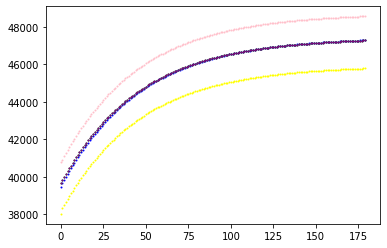

In [ ]:
plt.scatter(x_coordinates, y_coordinates, c = "blue", s = 1) #open
plt.scatter(x_coordinates, y_coordinates1, c = "pink", s = 1) #high
plt.scatter(x_coordinates, y_coordinates2, c = "yellow", s = 1) #low
plt.scatter(x_coordinates, y_coordinates3, c = "green", s = 1) #close
plt.scatter(x_coordinates, y_coordinates4, c = "purple", s = 1) #adj close


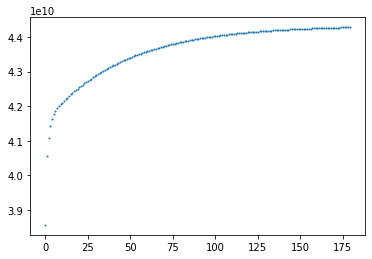

In [ ]:
plt.scatter(x_coordinates, y_coordinates5, s = 1)

Let's look at the values of bitcoin (so far), and the predictions we have made so far.

In [ ]:
june_df = pd.read_csv(join(path_prefix,"BTC-USD_june.csv"));
june_df.loc[june_df['Date'] == '2022-03-09']


,Date,Open,High,Low,Close,Adj Close,Volume
2730,2022-03-09,38742.816406,42465.671875,38706.09375,41982.925781,41982.925781,32284121034


In [ ]:
june_df = june_df[2730:]

In [ ]:
y_coordinates =  june_df["Open"]
y_coordinates1 = june_df["High"]
y_coordinates2 = june_df["Low"]
y_coordinates3 = june_df["Close"]
y_coordinates4 = june_df["Adj Close"]
y_coordinates5 = june_df["Volume"]

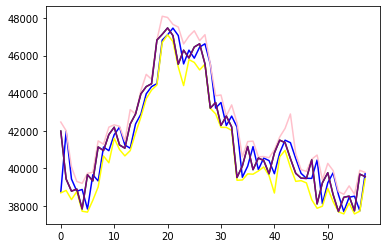

In [ ]:
x_coordinates =[]
for a in range (len(y_coordinates)):
  x_coordinates.append(a)
plt.plot(x_coordinates, y_coordinates, c = "blue") #open
plt.plot(x_coordinates, y_coordinates1, c = "pink") #high
plt.plot(x_coordinates, y_coordinates2, c = "yellow") #low
plt.plot(x_coordinates, y_coordinates3, c = "green") #close
plt.plot(x_coordinates, y_coordinates4, c = "purple") #adj close

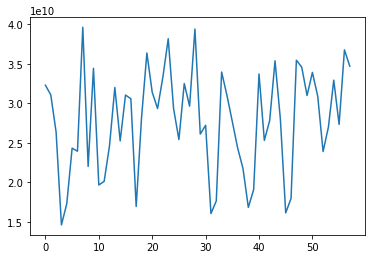

In [ ]:
plt.plot(x_coordinates, y_coordinates5)

In [ ]:
pred_june = finalDF[:len(june_df)]
pred_june

,Open,High,Low,Close,Adj Close,Volume
0,39447.393404,40799.831668,38014.636258,39645.257939,39645.257939,3.856587e+10
1,39651.320925,40913.879549,38331.269460,39811.759881,39811.759881,4.054444e+10
2,39818.065796,41091.662571,38503.423952,39976.712443,39976.712443,4.108930e+10
3,39983.529374,41258.888645,38659.941702,40136.689855,40136.689855,4.143966e+10
4,40143.565258,41421.439901,38813.669018,40293.745225,40293.745225,4.164017e+10
5,40300.704520,41579.761620,38965.681844,40447.601698,40447.601698,4.177082e+10
6,40454.643596,41734.367679,39115.263067,40598.259500,40598.259500,4.186346e+10
7,40605.387054,41885.477098,39262.068530,40745.726574,40745.726574,4.193611e+10
8,40752.939920,42033.244676,39405.938927,40890.043503,40890.043503,4.199787e+10
9,40897.341906,42177.781944,39546.825638,41031.263110,41031.263110,4.205349e+10


In [ ]:
y_coordinates =  pred_june["Open"]
y_coordinates1 = pred_june["High"]
y_coordinates2 = pred_june["Low"]
y_coordinates3 = pred_june["Close"]
y_coordinates4 = pred_june["Adj Close"]
y_coordinates5 = pred_june["Volume"]

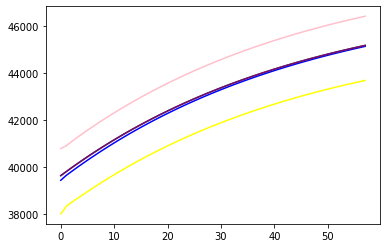

In [ ]:
x_coordinates =[]
for a in range (len(y_coordinates)):
  x_coordinates.append(a)
plt.plot(x_coordinates, y_coordinates, c = "blue") #open
plt.plot(x_coordinates, y_coordinates1, c = "pink") #high
plt.plot(x_coordinates, y_coordinates2, c = "yellow") #low
plt.plot(x_coordinates, y_coordinates3, c = "green") #close
plt.plot(x_coordinates, y_coordinates4, c = "purple") #adj close

Overall, our prediction system is unable to detect the fluctuations but is somewhat successful in detecting the overall trends, which is what we were aiming for. It is important to note that Bitcoin suffered from a fall noone anticipated mid-March, and had a hard time with a lot of fluctuations since then.

Bitcoin is a very hard currency to predict successfully, which makes it an interesting data to watch.

## Future Work

Bitcoin is a very fluctuating, hard-to-guess cryptocurrency that has changed the economic viewpoints and our society's understanding of currencies. It is not centralised, not regulated, therefore it is very hard to guess it's future and very open to any manipulation. Tomorrow we may wake up and see a drastic change with no warning whatsoever. It is a marvel to observe the changes.

We have tried to observe the manipulation of one rich man on a cryptocurrency and tried to understand the movement of the certain cryptocurrency. Understand the outliers. In the future, the same work may be put into other alternate coins and understand if the same changes applies to them. It is also possible to train different regressive methods and try to tune it into a more-accurate guessing algorithm. Than again, in a market that changes so fast and drastically, it is nearly impossible to do all-correct guesses. If so, some data scientists would be super-rich on bitcoins!